## Анализ спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Цель данногло проекта:
* понять, от чего может зависит покупка билетов на разные направления

Задачи:
* Изучить базу данных;
* Провести исследователький анализ данных
* Проверить гипотезу (Количество рейсов во время фестивалей увеличивается);


---
**Описание данных**

Датасет model:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Датасет flights:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года
- Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

---
1. [Изучение данных](#start)
2. [Предобработка данных](#preprocessing)
3. [Вывод](#conclusion)
---

###  Аналитика средствами Python

<a id='start'></a>
### 1. Изучение файлов с данными и общей информации по ним. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns


In [2]:
model = pd.read_csv('/Users/valeriyaniskorodova/Y.Praktikum/Module 2/Sprint 1/query_1.csv')

In [3]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
model.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Пропущенных значений нит, типы данных корректны, аномальных значений не обнаружено.

In [6]:
flights = pd.read_csv('/Users/valeriyaniskorodova/Y.Praktikum/Module 2/Sprint 1/query_3.csv')

In [7]:
flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Пропущенных значений нит, типы данных корректны, аномальных значений не обнаружено. 

<a id='preprocessing'></a>
### 2. Предобработка данных

In [17]:
flights['average_flights'] = np.round(flights['average_flights'], decimals=2)

Выбираю ТОП10 городов по количеству рейсов

In [18]:
top_10 = flights.sort_values(by='average_flights', ascending=False).head(10)

In [19]:
top_10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Среднее количество перелетов в Москву очень отличается от остальных городов, но это довольно логично, так как Москва является столицей, культурным центром, большинство людей приезжают сюда. Второе место занимает Санк-Петербург, среднее значение отличается в 4 раза, чем у Москвы, что значительно, это можно объяснить тем, что в этот город дешевле добираться на поезде.

Построим графики зависимостей: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

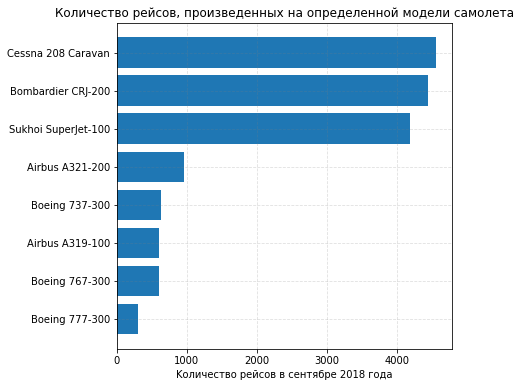

In [31]:
plt.figure(figsize=(6,6))
plt.barh(model.sort_values(by='flights_amount')['model'], model.sort_values(by='flights_amount')['flights_amount'])
plt.xlabel('Kоличество рейсов в сентябре 2018 года')
plt.title('Количество рейсов, произведенных на определенной модели самолета')
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
plt.show()

Из данного графика можно выделить 3 наиболее часто используемые модели самолетов авиакомпаниями: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Причем, количество рейсов, совершаемых на этих трех моделях самолетов примерно в 4 раза больше, чем на остальных. Заметим еще, что модель Cessna 208 Caravan лёгкий одномоторный турбовинтовой самолёт общего назначения с неубирающимся шасси, который может перевозить 14 пассажиров только.

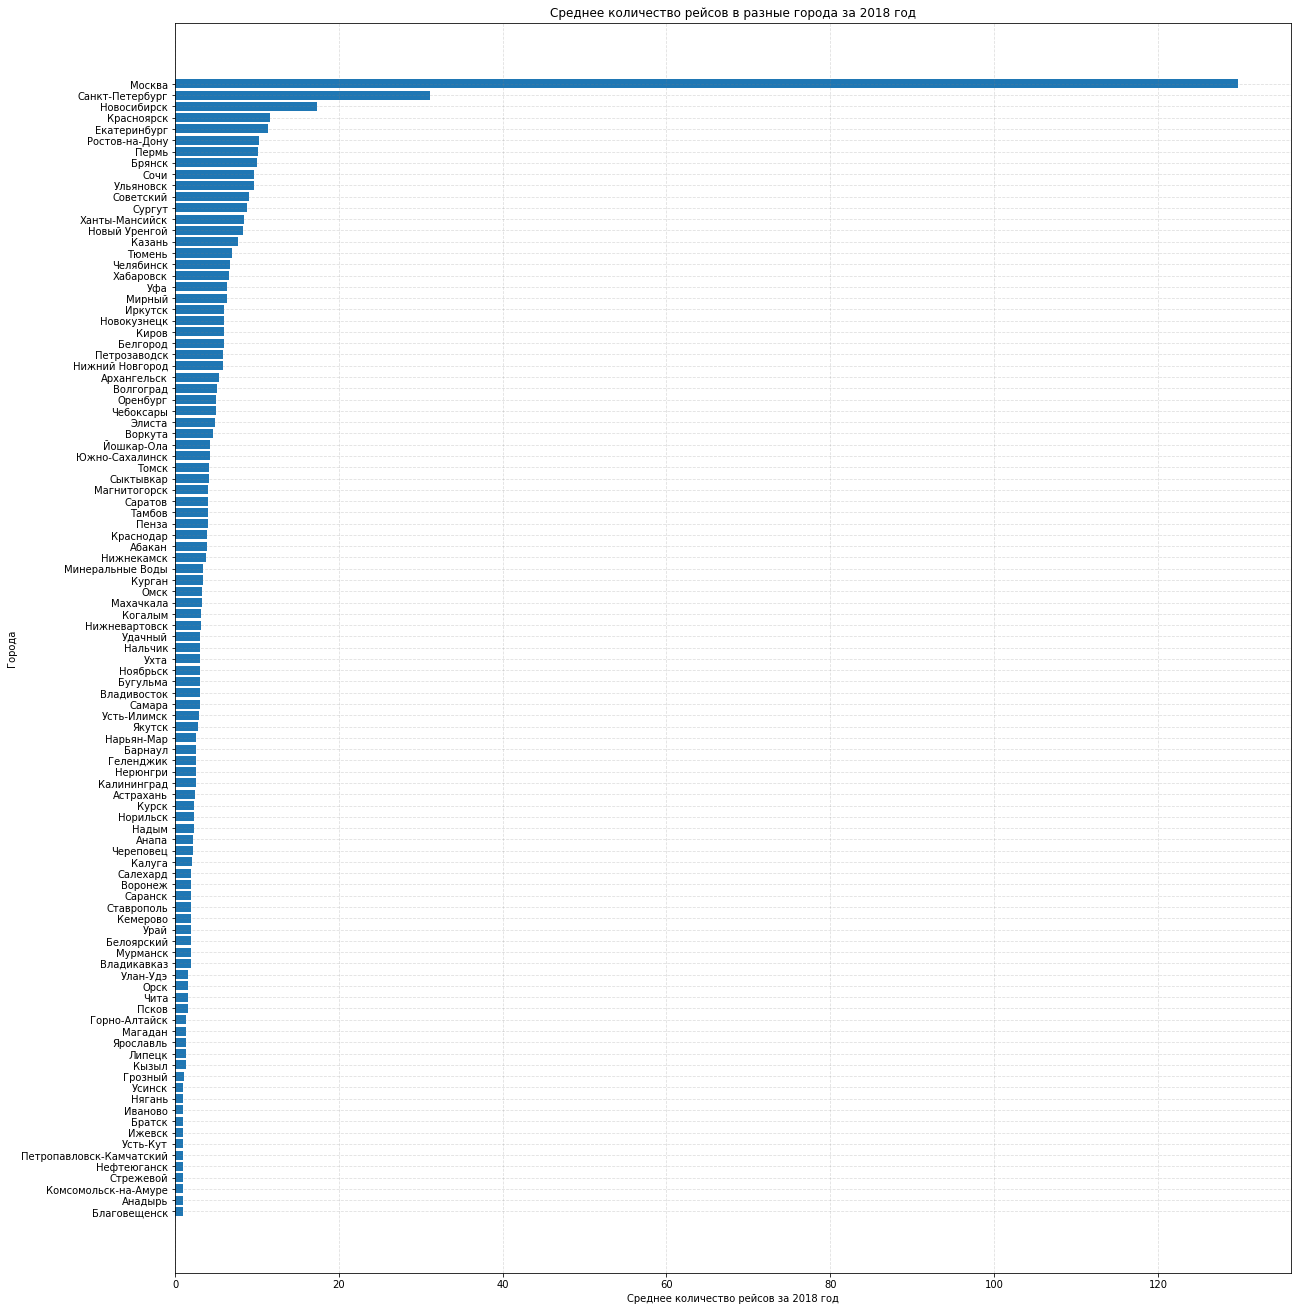

In [44]:
plt.figure(figsize=(20,23))
plt.barh(flights.sort_values(by='average_flights')['city'],
         flights.sort_values(by='average_flights')['average_flights'])

plt.title('Среднее количество рейсов в разные города за 2018 год')
plt.ylabel('Города')
plt.xlabel('Среднее количество рейсов за 2018 год')
plt.grid(True, linestyle='--', color = 'grey', which='major', alpha=.25)
plt.show()

Москва, по среднему количеству рейсов, превосходит другие города значительно. Построим такой график, но уже для ТОП10 городов.

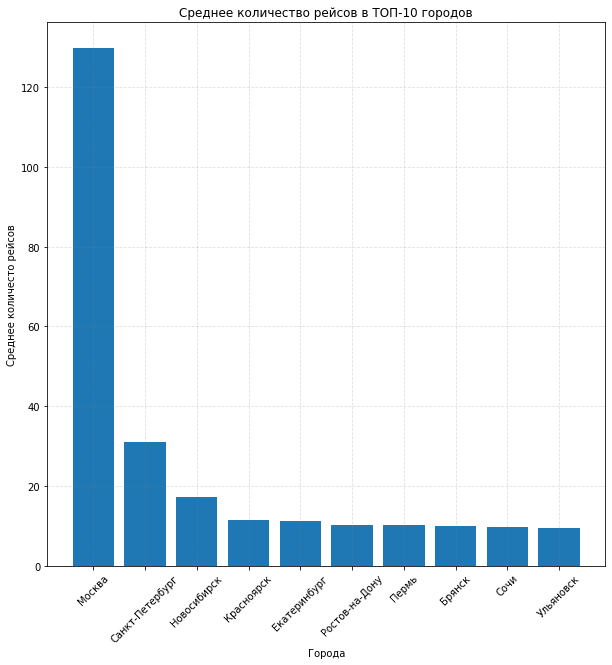

In [27]:
plt.figure(figsize=(10,10))
plt.bar(top_10['city'], top_10['average_flights'])
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', color = 'grey', which='major', alpha=.25)
plt.xlabel('Города')
plt.ylabel('Среднее количесто рейсов')
plt.title('Среднее количество рейсов в ТОП-10 городов')
plt.show()

Из графика заметно, что в Москву, Санк-Петербург и Новосибирск летают значительно чаще, нежели чем в остальные города, которые входят в ТОП-10 по среднему количеству рейсов. Как я уже говорила, Москва очень любима туристами, поэтому среднее значение рейсов раза в 4 больше, чем в Питер. 

Питер имеет такие показатели, потому что поехать на поезде дешевле, чем полететь на самолете. Также, существует сапсан - скоростной поезд, билеты на который выходят порой дешевле, чем на перелет.

Также, можно предположить, что большинство людей приезжают в Москву по деловым встречам, в командировки, поэтому такое высокое среднее количество рейсов.

---
<a id='conclusion'></a>
### Общий вывод

Были выгруженны данные с сайта и составлена таблица данных о 10 крупнейших фестивалях 2018 года. Из данной таблицы была получена таблица с информацией о количестве рейсов для каждой модели самолетов.

Посчитано среднее количество прибывающих рейсов в день для каждого города за август 2018 года

По полученным данным был сделан вывод о том, что во время фестивалей спрос на авиабилеты практически не меняется.

Из построенных графиковя я выделила 3 наиболее часто используемые модели самолетов авиакомпаниями: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100

Также, видно, что спрос в Москву намного выше, чем в другие города, это может зависит от множества фактрово.

Например, от того, что в Москве происходит много бизнес-встреч. Также, Москва - столица России, куда ездят большинство людей отдыхать во время отпуска.

Для того, чтобы более точно понять от чего зависит выбор покупателя, нужно больше данных для анализа.